In [472]:
from IPython.display import display, HTML

display(HTML("""
<h1 style="color: rgb(30, 166, 92); font-size: 48px; font-weight: bold;">
    Classifying MNIST just for fun
</h1>
"""))

In [473]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [474]:
import struct

def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        if magic != 2051:
            raise ValueError(f"Invalid magic number {magic} in image file")
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape((num, rows, cols))
        return images

def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        if magic != 2049:
            raise ValueError(f"Invalid magic number {magic} in label file")
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

In [475]:
X_train = load_images("train-images.idx3-ubyte")
Y_train = load_labels("train-labels.idx1-ubyte")

In [476]:
X_train=X_train.reshape(X_train.shape[0], -1)

In [477]:
len(X_train[0])

784

In [478]:
X_train=X_train/255

In [479]:
def actitan(x):
    return 1/(1+np.exp(-x))
def deract(x):
    s=actitan(x)
    return s*(1-s)
def softmax(x):
    x=x-np.max(x,axis=1,keepdims=True)
    y=np.exp(x)
    return y/(np.sum(y,axis=1,keepdims=True))

In [480]:
def init_params():
    W_1=np.random.rand(784,10)-0.5
    a_1=np.random.rand(1,10)
    W_2=np.random.rand(10,10)-0.5
    a_2=np.random.rand(1,10)
    return W_1,a_1,W_2,a_2
def classify(W_1,a_1,W_2,a_2,X):
    L_1=X.dot(W_1)+a_1
    A_1=actitan(L_1)
    L_2=A_1.dot(W_2)+a_2
    A_2=softmax(L_2)
    return L_1,A_1,L_2,A_2
def propag(L_1,A_1,L_2,A_2,W_2,X,Y):
    m=len(Y)
    labels=np.zeros((m,10))
    labels[np.arange(m),Y]=1
    e_2=A_2-labels
    eW_2=1/m *(A_1.T.dot(e_2))
    eb_2=1/m*np.sum(e_2,axis=0)
    e_1=e_2.dot(W_2.T)*deract(L_1)
    eW_1=1/m*(X.T.dot(e_1))
    eb_1=1/m*np.sum(e_1,axis=0)
    return eW_1,eW_2,eb_1,eb_2
def update(W_1,a_1,W_2,a_2,eW_2,eW_1,eb_1,eb_2,alpha):
    W_1=W_1-alpha*eW_1
    W_2=W_2-alpha*eW_2
    a_1=a_1-alpha*eb_1
    a_2=a_2-alpha*eb_2
    return W_1,a_1,W_2,a_2
def accuracy(A_2,Y):
    labels=np.argmax(A_2,axis=1)
    return np.sum(labels==Y)/len(Y)
def gradient(X,Y,iterations,alpha):
    W_1,a_1,W_2,a_2=init_params()
    for i in range(iterations):
        L_1,A_1,L_2,A_2=classify(W_1,a_1,W_2,a_2,X)
        eW_1,eW_2,eb_1,eb_2=propag(L_1,A_1,L_2,A_2,W_2,X,Y)
        W_1,a_1,W_2,a_2=update(W_1,a_1,W_2,a_2,eW_2,eW_1,eb_1,eb_2,alpha)
        if i%50==0:
            print(accuracy(A_2,Y))
    return W_1,a_1,W_2,a_2
    
def MNIST(X,W_1,a_1,W_2,a_2):
    L_1,A_1,L_2,A_2=classify(W_1,a_2,W_2,a_2)
    return np.argmax(A_2)
    

In [481]:
W_1,a_1,W_2,a_2=gradient(X_train,Y_train,1000,0.1)

0.06583333333333333
0.27231666666666665
0.41606666666666664
0.5034833333333333
0.5663166666666667
0.6176
0.6581333333333333
0.6872833333333334
0.7090166666666666
0.72595
0.7401333333333333
0.7534166666666666
0.7645333333333333
0.7749666666666667
0.7831
0.7916666666666666
0.7993166666666667
0.8069166666666666
0.8133166666666667
0.8191166666666667


Different activation

In [483]:
def actitan(x):
    return np.maximum(0,x)
def deract(x):
    return (x>0).astype(float)
def softmax(x):
    x=x-np.max(x,axis=1,keepdims=True)
    y=np.exp(x)
    return y/(np.sum(y,axis=1,keepdims=True))

def init_params():
    W_1=np.random.rand(784,10)-0.5
    a_1=np.random.rand(1,10)
    W_2=np.random.rand(10,10)-0.5
    a_2=np.random.rand(1,10)
    return W_1,a_1,W_2,a_2
def classify(W_1,a_1,W_2,a_2,X):
    L_1=X.dot(W_1)+a_1
    A_1=actitan(L_1)
    L_2=A_1.dot(W_2)+a_2
    A_2=softmax(L_2)
    return L_1,A_1,L_2,A_2
def propag(L_1,A_1,L_2,A_2,W_2,X,Y):
    m=len(Y)
    labels=np.zeros((m,10))
    labels[np.arange(m),Y]=1
    e_2=A_2-labels
    eW_2=1/m *(A_1.T.dot(e_2))
    eb_2=1/m*np.sum(e_2,axis=0)
    e_1=e_2.dot(W_2.T)*deract(L_1)
    eW_1=1/m*(X.T.dot(e_1))
    eb_1=1/m*np.sum(e_1,axis=0)
    return eW_1,eW_2,eb_1,eb_2
def update(W_1,a_1,W_2,a_2,eW_2,eW_1,eb_1,eb_2,alpha):
    W_1=W_1-alpha*eW_1
    W_2=W_2-alpha*eW_2
    a_1=a_1-alpha*eb_1
    a_2=a_2-alpha*eb_2
    return W_1,a_1,W_2,a_2
def accuracy(A_2,Y):
    labels=np.argmax(A_2,axis=1)
    return np.sum(labels==Y)/len(Y)
def gradient(X,Y,iterations,alpha):
    W_1,a_1,W_2,a_2=init_params()
    for i in range(iterations):
        L_1,A_1,L_2,A_2=classify(W_1,a_1,W_2,a_2,X)
        eW_1,eW_2,eb_1,eb_2=propag(L_1,A_1,L_2,A_2,W_2,X,Y)
        W_1,a_1,W_2,a_2=update(W_1,a_1,W_2,a_2,eW_2,eW_1,eb_1,eb_2,alpha)
        if i%50==0:
            print(accuracy(A_2,Y))
    return W_1,a_1,W_2,a_2
    
def MNIST(X,W_1,a_1,W_2,a_2):
    L_1,A_1,L_2,A_2=classify(W_1,a_2,W_2,a_2,X)
    return np.argmax(A_2,axis=1)
    

In [484]:
W_1,a_1,W_2,a_2=gradient(X_train,Y_train,2000,0.1)

0.08686666666666666
0.49456666666666665
0.63805
0.7254833333333334
0.7747166666666667
0.8038833333333333
0.8213833333333334
0.8343166666666667
0.84385
0.8508
0.8566
0.86165
0.8654666666666667
0.8688333333333333
0.8719833333333333
0.8751333333333333
0.8780833333333333
0.8807333333333334
0.8829
0.8849166666666667
0.8868333333333334
0.8890666666666667
0.89085
0.8922666666666667
0.8934166666666666
0.89515
0.8964666666666666
0.89755
0.8986666666666666
0.8999
0.90085
0.9016666666666666
0.9028
0.90375
0.9049166666666667
0.9056666666666666
0.9063333333333333
0.90705
0.9076833333333333
0.9083


In [485]:
def plot_digit(X,Y,index):
    label=MNIST(X,W_1,a_1,W_2,a_2)[index]
    plt.imshow(X[index].reshape(28,28),cmap='gray')
    plt.title(f'Allegedly: {label}' ' VS ' f'{Y[index]}')
    plt.show()

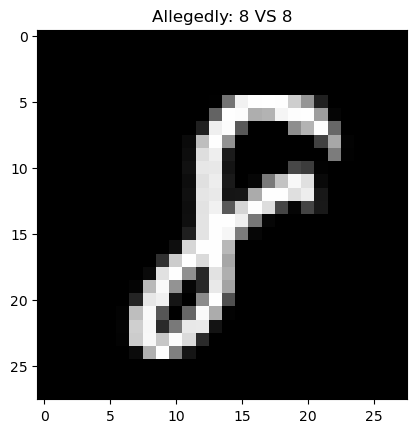

In [486]:
plot_digit(X_train,Y_train,575)

In [487]:
X_test = load_images("t10k-images.idx3-ubyte")
Y_test = load_labels("t10k-labels.idx1-ubyte")
X_test=X_test.reshape(X_test.shape[0], -1)
X_test=X_test/255

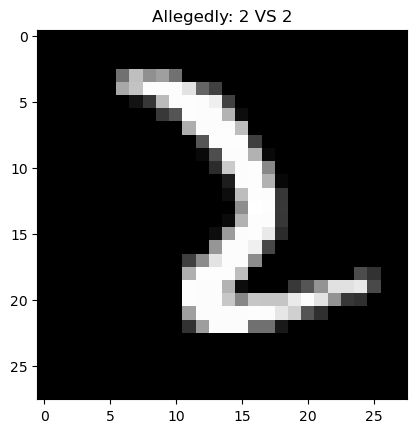

In [488]:
plot_digit(X_test,Y_test,653)

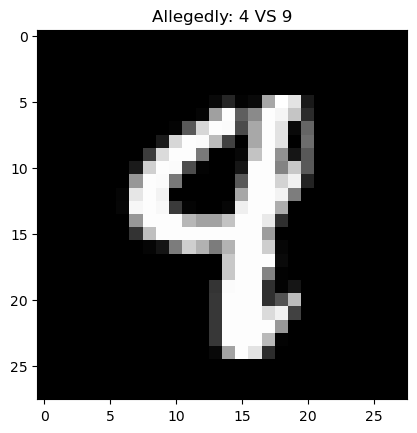

In [514]:
plot_digit(X_test,Y_test,359)